In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [16]:
data=pd.read_excel('etab2020.xlsx',engine='openpyxl')

In [17]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data = data.select_dtypes(exclude=['object'])

In [18]:
data

,Caractéristiques des établissements 2021.COM,Caractéristiques des établissements 2021.REG,Caractéristiques des établissements 2021.DEP,ETTOT21,ETAZ21,ETBE21,ETFZ21,ETGU21,ETGZ21,ETOQ21,...,ET_GZ,ET_HZ,ET_IZ,ET_JZ,ET_KZ,ET_LZ,ET_MN,ET_OQ,ET_RU,NTLBIN
0,33063,75,33,13954,17,439,742,11158,2540,1598,...,2463,216,1675,635,811,592,2783,1573,1463,1
1,86194,75,86,3140,3,122,129,2384,675,502,...,667,62,289,66,197,83,469,508,483,1
2,64102,75,64,2634,9,135,173,1965,579,352,...,558,45,267,42,176,93,493,333,247,1
3,17300,75,17,3791,32,241,205,2893,714,420,...,722,94,473,94,229,158,654,417,394,1
4,87085,75,87,5030,50,277,321,3676,1067,706,...,1023,114,464,109,267,147,891,704,584,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,47120,75,47,6,3,0,1,0,0,2,...,0,0,0,0,0,0,0,2,0,0
4304,47121,75,47,8,3,1,2,0,0,2,...,1,0,0,0,0,0,0,2,0,0
4305,47122,75,47,8,5,0,1,1,0,1,...,0,0,0,0,0,0,0,1,1,0
4306,47073,75,47,6,3,0,0,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [19]:
data=data.drop('Caractéristiques des établissements 2021.COM',axis=1)
data=data.drop('Caractéristiques des établissements 2021.REG',axis=1)
data=data.drop('Caractéristiques des établissements 2021.DEP',axis=1)
data=data.drop('Postes salariés des établissements actifs fin 2020.COM',axis=1)
data=data.drop('Postes salariés des établissements actifs fin 2020.REG',axis=1)
data=data.drop('Postes salariés des établissements actifs fin 2020.DEP',axis=1)
data=data.drop("Nombre d'établissements actifs fin 2020.COM",axis=1)
data=data.drop("Nombre d'établissements actifs fin 2020.DEP",axis=1)
data=data.drop("Nombre d'établissements actifs fin 2020.REG",axis=1)

In [21]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
ETTOT21    0.321519
ETAZ21     0.132786
ETBE21     0.390021
ETFZ21     0.360414
ETGU21     0.303630
             ...   
ET_LZ      0.265446
ET_MN      0.274658
ET_OQ      0.341737
ET_RU      0.318921
NTLBIN     1.000000
Name: NTLBIN, Length: 131, dtype: float64


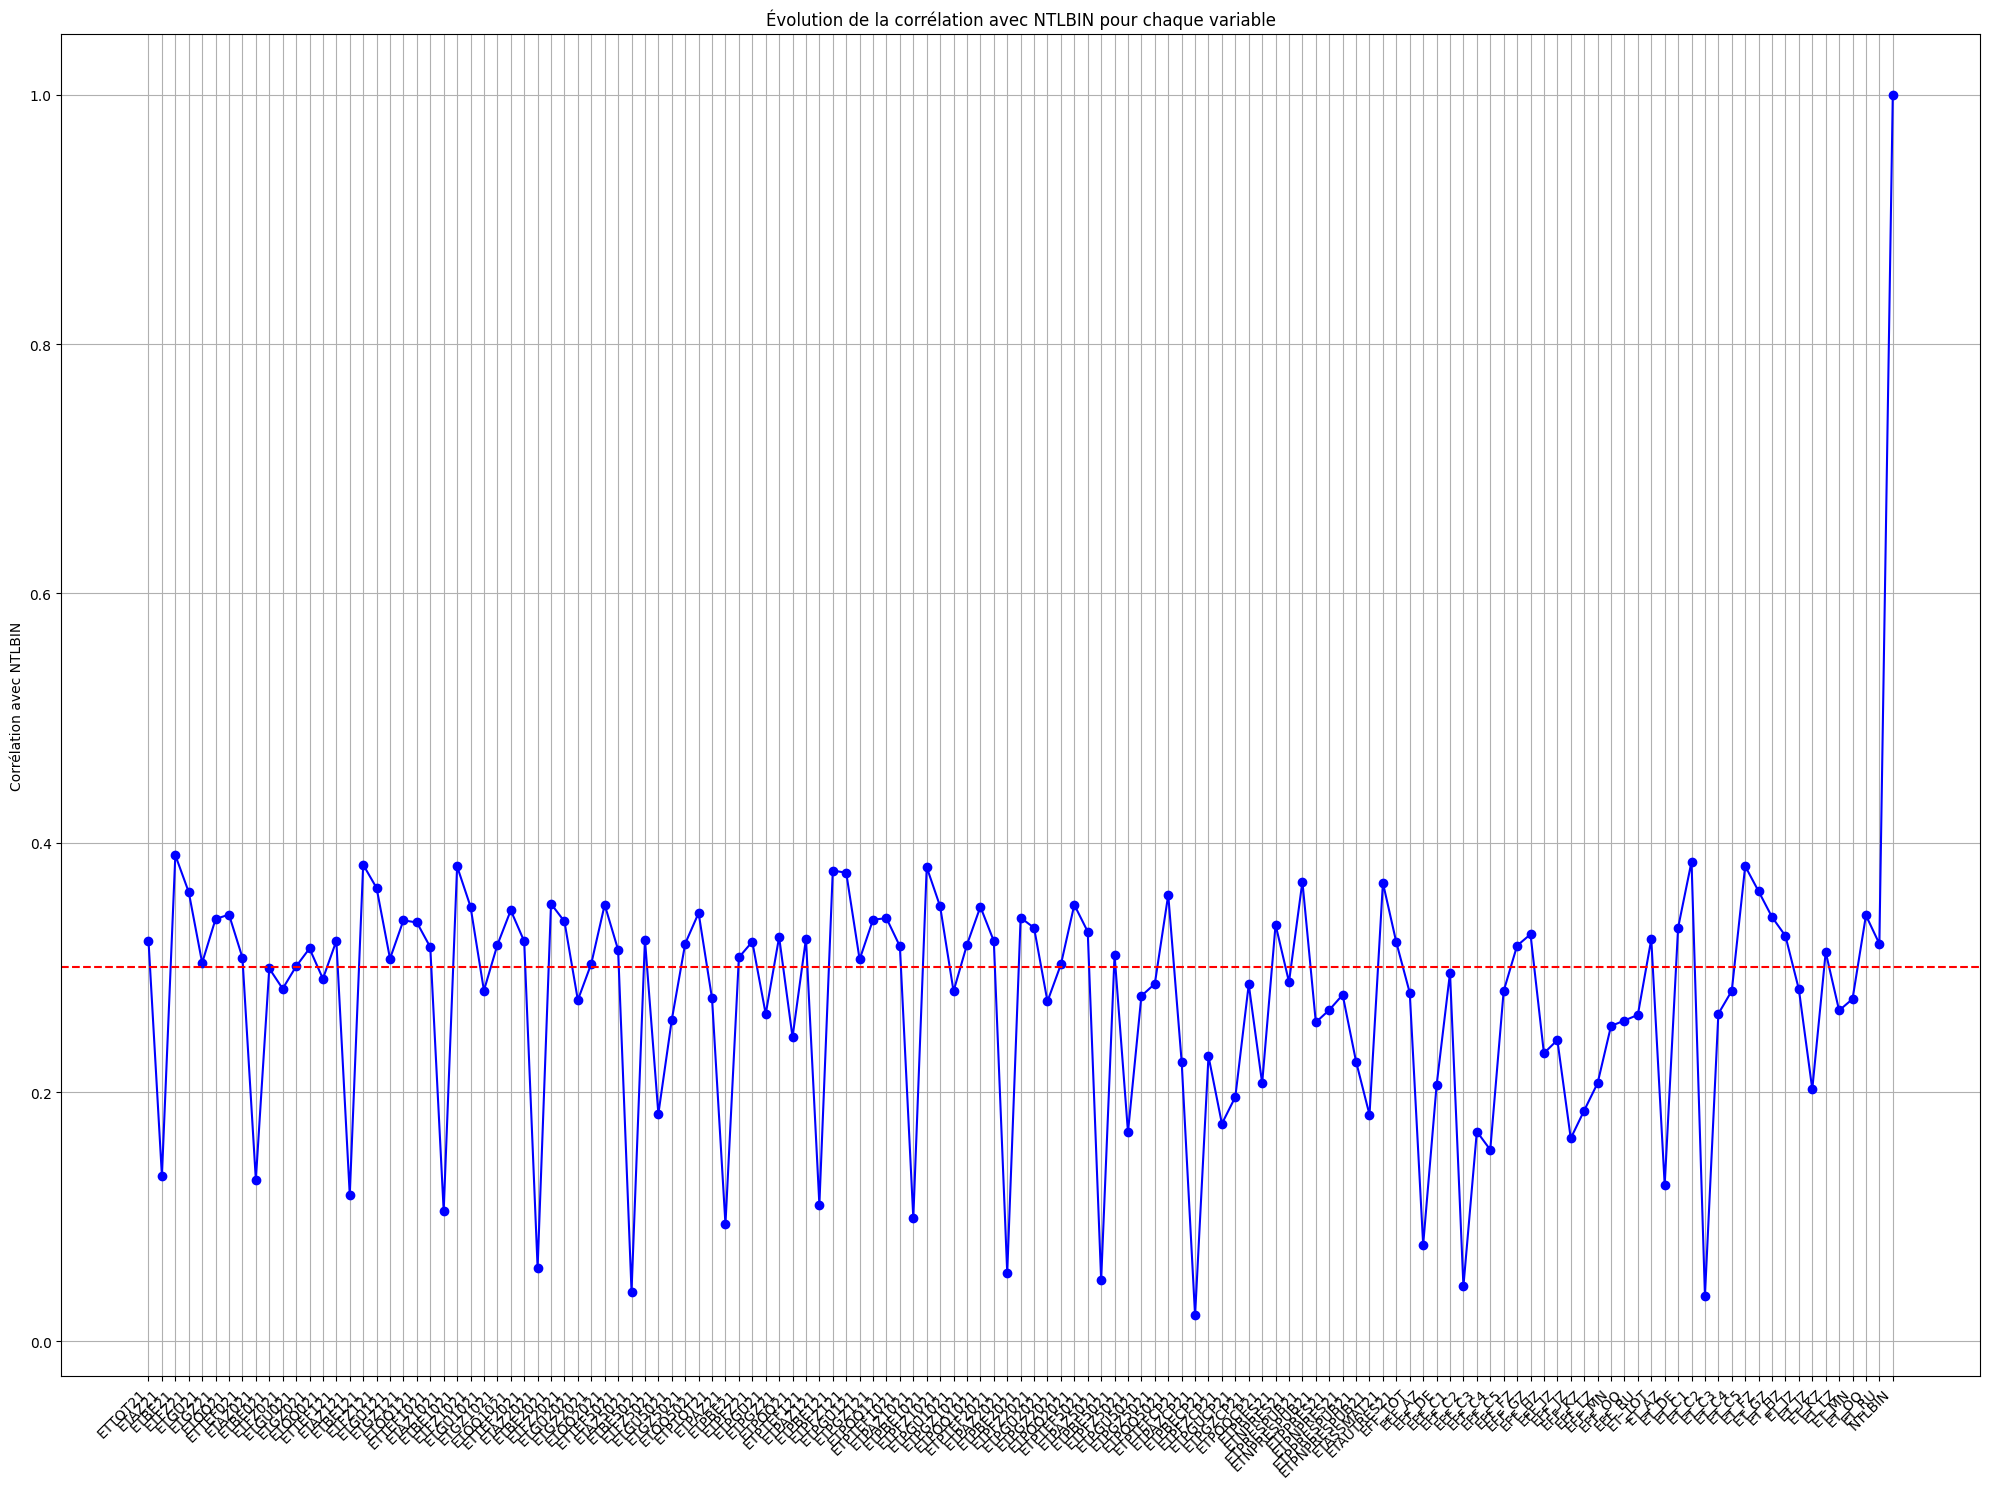

In [22]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 10



# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


In [24]:
Z=X.columns
print(Z)

Index(['ETBE021', 'ETFZ021', 'ETGZ021', 'ETOQ021', 'ETAZ1021', 'ETAZ2021',
       'ETFZ2021', 'ETAZ5021', 'ETFZ5021', 'ETPAZ121', 'ETPBE1021',
       'ETPBE2021', 'ETPGZ5021', 'ETPAZCP21', 'ETPBECP21', 'ETPFZCP21',
       'ETPGZCP21', 'ETNPRESPUB21', 'ETPPRESPUB21', 'ETPNPRESPUB21',
       'ETASSMAT21', 'EFF_DE', 'EFF_C1', 'EFF_C2', 'EFF_C3', 'EFF_C4',
       'EFF_HZ', 'EFF_KZ', 'ET_DE', 'ET_C2', 'ET_C3', 'ET_C4'],
      dtype='object')


In [30]:
colonnes=[]
for txt in Z:
    colonnes.append(txt)


X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())



         Current function value: 0.473020
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4308
Model:                          Logit   Df Residuals:                     4276
Method:                           MLE   Df Model:                           31
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  -1.566
Time:                        17:49:37   Log-Likelihood:                -2037.8
converged:                      False   LL-Null:                       -794.09
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ETBE021          -0.0751      0.118     -0.638      0.524      -0.306       0.156
ETFZ021          -0.0621      0.060     -1.043      0.29

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[811   4]
 [ 37  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       815
           1       0.71      0.21      0.33        47

    accuracy                           0.95       862
   macro avg       0.84      0.60      0.65       862
weighted avg       0.94      0.95      0.94       862


Accuracy Score:
0.9524361948955916


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


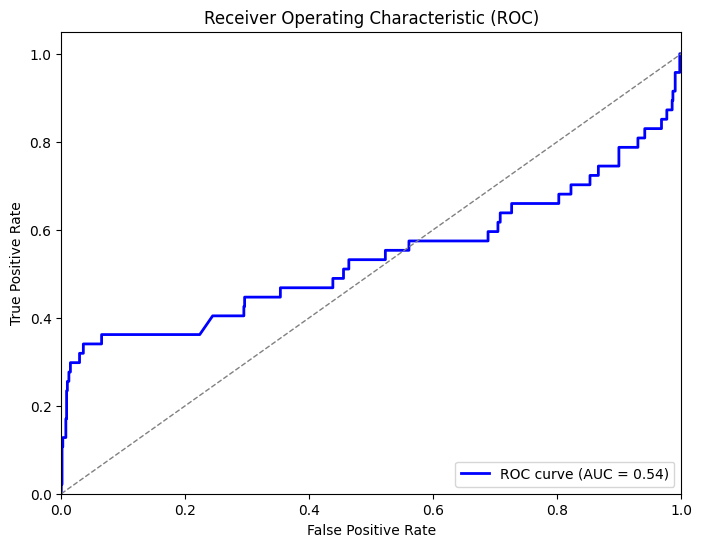

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()